In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [3]:
df = pd.read_csv('Social_Network_Ads.csv',usecols=['Age','EstimatedSalary','Purchased'])

In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
df.duplicated().sum()

33

In [6]:
df_cleaned = df.drop_duplicates()

In [7]:
df_cleaned.duplicated().sum()

0

In [8]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test =  train_test_split(df_cleaned.drop('Purchased',axis=1),   df_cleaned['Purchased'],test_size=0.3, random_state=0)

X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((256, 2), (111, 2), (256,), (111,))

In [9]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)

x_train_scale = scalar.transform(X_train)
x_test_scale = scalar.transform(X_test)

In [10]:
x_train_scale
x_test_scale

array([[-0.08462692,  0.04245045],
       [ 1.0606326 ,  0.52990259],
       [-1.22988645,  0.27183969],
       [ 0.86975601, -1.13316942],
       [ 0.10624966, -0.78908556],
       [ 0.77431772,  0.12847142],
       [-0.27550351, -0.73173825],
       [ 1.82413894, -0.27295976],
       [-0.08462692,  2.19297461],
       [-1.03900986,  0.41520797],
       [ 0.10624966, -0.2442861 ],
       [ 0.29712625, -1.13316942],
       [-0.27550351, -0.2442861 ],
       [ 0.39256454, -0.44500169],
       [-0.18006522, -0.27295976],
       [-0.27550351,  0.61592356],
       [ 0.10624966,  0.27183969],
       [-1.13444815, -0.98980115],
       [ 1.0606326 ,  0.47255528],
       [-1.03900986,  0.75929184],
       [-0.84813327, -0.2442861 ],
       [ 0.9651943 ,  0.75929184],
       [-1.22988645,  0.50122894],
       [ 1.0606326 ,  2.04960633],
       [ 0.9651943 , -1.13316942],
       [ 2.11045382, -0.78908556],
       [-1.22988645,  0.30051335],
       [ 0.20168796,  0.04245045],
       [ 0.20168796,

In [11]:
X_train.describe()

,Age,EstimatedSalary
count,256.000000,256.000000
mean,37.886719,69519.531250
std,10.498499,34943.534415
min,18.000000,15000.000000
25%,30.000000,42750.000000
50%,37.000000,68000.000000
75%,46.000000,88000.000000
max,60.000000,149000.000000


In [12]:
x_train_scale = pd.DataFrame(x_train_scale)
x_test_scale = pd.DataFrame(x_test_scale)

In [13]:
np.round(x_train_scale.describe())

,0,1
count,256.0,256.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,2.0,2.0


In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scale = LogisticRegression()

lr.fit(X_train,y_train)
lr_scale.fit(x_train_scale,y_train)

LogisticRegression()

In [15]:
predic = lr.predict(X_test)
scaler_predict = lr_scale.predict(x_test_scale)

In [16]:
from sklearn.metrics import accuracy_score


In [17]:
print('actual score',accuracy_score(y_test,predic))
print('scale',accuracy_score(y_test,scaler_predict))

actual score 0.8378378378378378
scale 0.8198198198198198


In [23]:
df = pd.read_csv('placement.csv',usecols=['cgpa','iq','placement'])

<Axes: xlabel='cgpa', ylabel='iq'>

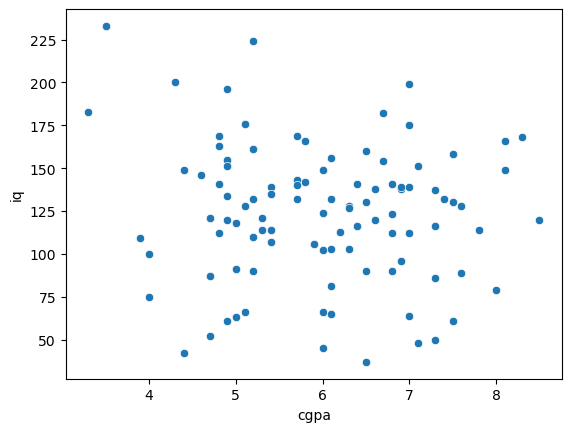

In [24]:
sns.scatterplot(data = df , x='cgpa', y='iq')

<Axes: ylabel='iq'>

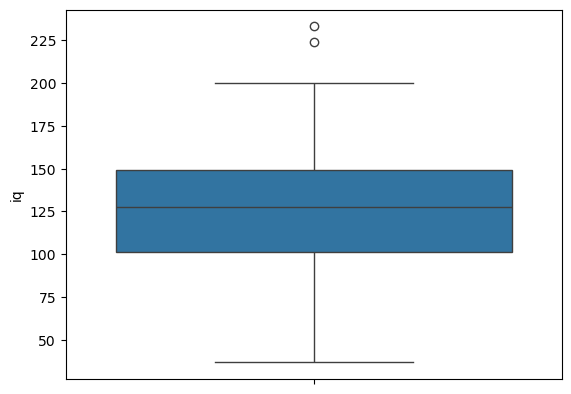

In [25]:
sns.boxplot(df['iq'])